# Stack Overflow

## Introduction 

In [ ]:
print("your firstname your lastname")

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (e.g. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (e.g. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework. 

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(25 pts)**

Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)** 

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

-----------------

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import datetime


df = pd.read_csv('question_dataframe.csv')
df

,Unnamed: 0,CreationDate,Id,OwnerUserId,Tags
0,0,2015-01-01T00:00:58.253,27727385,3210431.0,php
1,1,2015-01-01T00:01:43.673,27727388,868779.0,apache-pig
2,2,2015-01-01T00:02:32.123,27727391,4372672.0,ios
3,3,2015-01-01T00:02:57.983,27727393,2482149.0,sql-server
4,4,2015-01-01T00:03:31.337,27727394,4263870.0,php
5,5,2015-01-01T00:04:01.407,27727396,4409381.0,android
6,6,2015-01-01T00:05:03.773,27727406,875317.0,c#
7,7,2015-01-01T00:05:27.167,27727407,821742.0,java
8,8,2015-01-01T00:05:34.733,27727408,2595033.0,c#
9,9,2015-01-01T00:06:17.720,27727409,1815395.0,apache


In [2]:
df1 = df.sort_values(by='OwnerUserId')
dff = df1
df1

,Unnamed: 0,CreationDate,Id,OwnerUserId,Tags
701698,701698,2015-04-15T03:28:27.593,29641104,25.0,ios
975396,975396,2015-05-22T18:08:05.160,30403214,29.0,azure
975803,975803,2015-05-22T19:15:00.793,30404305,29.0,azure
747941,747941,2015-04-21T12:38:43.293,29772458,29.0,azure
1393938,1393938,2015-07-21T12:15:51.740,31538783,29.0,elasticsearch
2222278,2222278,2015-11-17T14:29:24.873,33759446,33.0,visual-studio
1314360,1314360,2015-07-09T16:38:55.007,31323477,37.0,javascript
2231705,2231705,2015-11-18T15:43:08.133,33784363,37.0,javascript
1408243,1408243,2015-07-23T03:01:13.110,31577466,37.0,php
1219360,1219360,2015-06-26T08:12:22.660,31068191,39.0,c#


In [3]:
df1.iloc[:,3]
df1_groups = df1.groupby('OwnerUserId')

df2 = df1.groupby('OwnerUserId').size()
df2.sort_values()
df3 = df2.sort_values()
df3.tail(100)
df4 = df3.tail(100)
df4

OwnerUserId
651887.0     157
4968722.0    158
264052.0     159
1197249.0    159
40106.0      159
122536.0     160
3595549.0    160
3736648.0    160
1137669.0    161
4499505.0    161
3102968.0    161
1765862.0    163
1344545.0    164
1778465.0    165
1709088.0    165
3142695.0    166
2694184.0    166
656912.0     167
4790312.0    167
1675976.0    168
168738.0     168
4621100.0    169
719427.0     169
340688.0     170
2714301.0    172
4083744.0    173
441016.0     175
3317808.0    175
1089623.0    175
535556.0     175
            ... 
1056563.0    217
835883.0     218
1186050.0    223
2187407.0    223
38522.0      227
1828637.0    227
470184.0     230
194000.0     231
1032531.0    232
979331.0     233
409976.0     235
4480164.0    237
611750.0     243
2725435.0    245
1647559.0    250
4371033.0    252
3701974.0    254
4034437.0    254
607407.0     256
1055664.0    261
784597.0     262
2674303.0    272
4009451.0    296
4381665.0    323
1223975.0    332
1833945.0    335
651174.0     338
11

In [4]:
#The top 100 users are put in a list
list = []   
for i in range(0,100):
    list.append(df4.index[99-i])    
list

[875317.0,
 2786156.0,
 1194415.0,
 651174.0,
 1833945.0,
 1223975.0,
 4381665.0,
 4009451.0,
 2674303.0,
 784597.0,
 1055664.0,
 607407.0,
 4034437.0,
 3701974.0,
 4371033.0,
 1647559.0,
 2725435.0,
 611750.0,
 4480164.0,
 409976.0,
 979331.0,
 1032531.0,
 194000.0,
 470184.0,
 1828637.0,
 38522.0,
 2187407.0,
 1186050.0,
 835883.0,
 1056563.0,
 1013512.0,
 1510701.0,
 1146775.0,
 2545680.0,
 1501700.0,
 1647457.0,
 4383667.0,
 728750.0,
 239219.0,
 4790217.0,
 608639.0,
 551273.0,
 2544036.0,
 343204.0,
 218349.0,
 2879704.0,
 3632206.0,
 2612235.0,
 3663882.0,
 1272683.0,
 1833423.0,
 1303170.0,
 4071819.0,
 524861.0,
 1283776.0,
 1525840.0,
 2860931.0,
 2378710.0,
 1995781.0,
 3371056.0,
 1904273.0,
 1103606.0,
 342235.0,
 2038257.0,
 3675188.0,
 4739628.0,
 1543374.0,
 3646408.0,
 1899010.0,
 2391849.0,
 535556.0,
 1089623.0,
 3317808.0,
 441016.0,
 4083744.0,
 2714301.0,
 340688.0,
 719427.0,
 4621100.0,
 168738.0,
 1675976.0,
 4790312.0,
 656912.0,
 2694184.0,
 3142695.0,
 17090

In [5]:
dff = df.sort_values(by='OwnerUserId')
dff
dff2 = dff
dff2[dff2.OwnerUserId==list[0]]
dff3=dff2[dff2.OwnerUserId==list[0]]

for i in range(1,100):
    dff2 = dff
    dff2[dff2.OwnerUserId==list[i]]
    dff1=dff2[dff2.OwnerUserId==list[i]]
    dff3 = dff3.append(dff1,ignore_index = True)
dff3    

,Unnamed: 0,CreationDate,Id,OwnerUserId,Tags
0,512502,2015-03-18T17:59:15.000,29129378,875317.0,c#
1,1635031,2015-08-24T15:51:25.617,32186554,875317.0,meteor
2,659837,2015-04-08T21:26:14.563,29525650,875317.0,c#
3,2046536,2015-10-22T23:54:54.927,33292731,875317.0,javascript
4,1707899,2015-09-03T18:00:23.537,32382501,875317.0,css
5,1763443,2015-09-11T23:09:06.060,32533354,875317.0,javascript
6,1365734,2015-07-16T19:02:23.807,31462442,875317.0,jquery
7,108731,2015-01-19T20:00:37.167,28032597,875317.0,c#
8,698191,2015-04-14T15:40:53.720,29631685,875317.0,css
9,2393694,2015-12-10T16:49:25.970,34207383,875317.0,c#


In [6]:
dff5 = dff3[['OwnerUserId','CreationDate']]
dff5
dff6 = dff5.to_dict()
dff6
dff8 = dff6['OwnerUserId']#this is a dictionary of OwnerUserId
dff8
dff7 = dff6['CreationDate']#this is a dictionary of CreationDate


In [7]:
#Here the freq_list is computed which contains the frequency of questions of every month of the top 100 users.
freq_list = [[0 for j in range(12)]for i in (list)]
for i in range(100):
    for j in range(12):
        freq_list[i][j] = 0
for a in range(100):
    for i in range(20857):
        if((dff8[i] == list[a])&('2015-01' in dff7[i])):
            freq_list[a][0]+=1
        elif((dff8[i] == list[a])&('2015-02' in dff7[i])):
            freq_list[a][1]+=1
        elif((dff8[i] == list[a])&('2015-03' in dff7[i])):
            freq_list[a][2]+=1
        elif((dff8[i] == list[a])&('2015-04' in dff7[i])):
            freq_list[a][3]+=1
        elif((dff8[i] == list[a])&('2015-05' in dff7[i])):
            freq_list[a][4]+=1
        elif((dff8[i] == list[a])&('2015-06' in dff7[i])):
            freq_list[a][5]+=1
        elif((dff8[i] == list[a])&('2015-07' in dff7[i])):
            freq_list[a][6]+=1
        elif((dff8[i] == list[a])&('2015-08' in dff7[i])):
            freq_list[a][7]+=1
        elif((dff8[i] == list[a])&('2015-09' in dff7[i])):
            freq_list[a][8]+=1
        elif((dff8[i] == list[a])&('2015-10' in dff7[i])):
            freq_list[a][9]+=1
        elif((dff8[i] == list[a])&('2015-11' in dff7[i])):
            freq_list[a][10]+=1
        elif((dff8[i] == list[a])&('2015-12' in dff7[i])):
            freq_list[a][11]+=1

freq_list

[[37, 16, 37, 34, 22, 50, 49, 44, 49, 50, 38, 50],
 [44, 30, 7, 28, 48, 38, 31, 32, 25, 42, 28, 10],
 [42, 34, 46, 39, 23, 14, 20, 40, 39, 33, 17, 14],
 [40, 35, 40, 25, 38, 21, 35, 24, 25, 24, 8, 23],
 [24, 39, 25, 36, 24, 26, 20, 30, 24, 31, 26, 30],
 [22, 21, 21, 27, 31, 47, 37, 39, 17, 22, 14, 34],
 [12, 36, 31, 37, 25, 22, 32, 28, 36, 29, 9, 26],
 [30, 7, 19, 17, 21, 46, 29, 30, 47, 24, 17, 9],
 [26, 30, 15, 27, 19, 22, 22, 30, 28, 25, 15, 13],
 [34, 14, 20, 9, 15, 18, 17, 12, 15, 28, 40, 40],
 [26, 33, 25, 45, 11, 24, 17, 18, 40, 18, 3, 1],
 [18, 22, 41, 21, 21, 0, 4, 3, 28, 45, 31, 22],
 [20, 33, 12, 40, 27, 9, 0, 22, 29, 21, 37, 4],
 [23, 0, 13, 28, 15, 24, 30, 24, 35, 16, 11, 35],
 [2, 46, 23, 24, 33, 19, 26, 19, 28, 30, 1, 1],
 [20, 8, 21, 21, 38, 17, 8, 14, 27, 23, 17, 36],
 [27, 5, 10, 18, 17, 18, 28, 32, 36, 12, 23, 19],
 [15, 11, 15, 11, 18, 20, 28, 20, 40, 27, 26, 12],
 [0, 0, 17, 32, 41, 39, 27, 16, 5, 17, 20, 23],
 [23, 34, 27, 36, 5, 22, 25, 11, 23, 7, 12, 10],
 [12, 

In [8]:
import numpy as np
import pylab as pl

dist = 100
u = 0
v = 0
maximum = 0
x = 0
y = 0
#x,y represent the most similar two
#u,v represent the least similar two
for i in range(100):
    for j in range(100):
        if i!=j:
            a = np.array(freq_list[i])
            b = np.array(freq_list[j])
            sim = np.linalg.norm(a-b)
            if sim<dist:
                dist = sim
                x = i
                y = j
            if sim>maximum:
                maximum = sim
                u = i
                v = j
print(dist,x,y,'######',maximum,u,v)


18.547236991 55 73 ###### 116.245430018 0 74


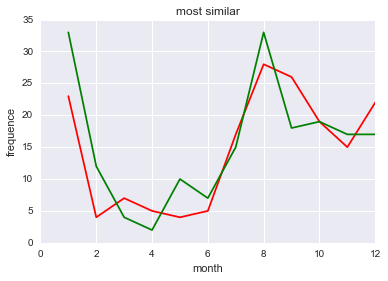

In [9]:
#The month is chosen as timeseries because during summer break or fall break months
#People tend to post less questions whereas,
#during school days they post more questions.  <numpy.linalg.norm> is used to compute the similarity
#of two users because it's pretty straightforward to get the outcome and I just need to
#compare which is the biggest and the smallest number.
%matplotlib inline 
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = freq_list[73]
z = freq_list[55]
pl.plot(x,y,'r')
pl.plot(x,z,'g')
pl.title('most similar')
pl.xlabel('month')
pl.ylabel('frequence')
pl.show()

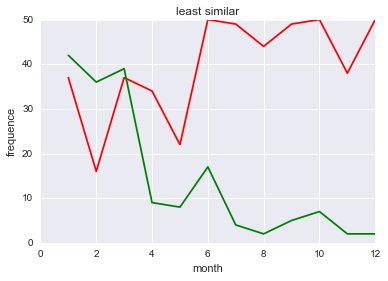

In [10]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = fre_list[0]
z = fre_list[74]
pl.plot(x,y,'r')
pl.plot(x,z,'g')
pl.title('least similar')
pl.xlabel('month')
pl.ylabel('frequence')
pl.show()

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In [68]:
##Another method named manhattan distance is applied here to compute the similarity

from math import*
dist = 100
u = 0
v = 0
maximum = 0
x = 0
y = 0
#x,y represent the most similar two
#u,v represent the least similar two
for i in range(100):
    for j in range(100):
        if i!=j:
            
            a = freq_list[i]
            b = freq_list[j]
            sim = manhattan_distance(a,b)
            if sim<dist:
                dist = sim
                x = i
                y = j
            if sim>maximum:
                maximum = sim
                u = i
                v = j
print(dist,x,y,'######',maximum,u,v)

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))


54 29 31 ###### 369 0 89


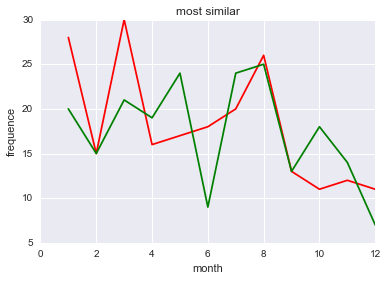

In [69]:
#This is the the most similar graph
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = freq_list[29]
z = freq_list[31]
pl.plot(x,y,'r')
pl.plot(x,z,'g')
pl.title('most similar')
pl.xlabel('month')
pl.ylabel('frequence')
pl.show()

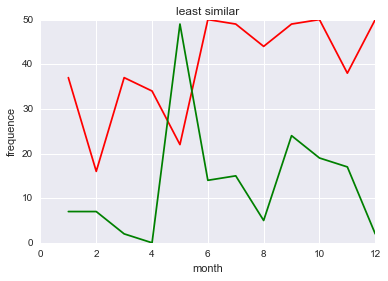

In [71]:
#This is the the least similar graph
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = freq_list[0]
z = freq_list[89]
pl.plot(x,y,'r')
pl.plot(x,z,'g')
pl.title('least similar')
pl.xlabel('month')
pl.ylabel('frequence')
pl.show()

##############

As it is seen in the graphs, there is some difference in the outputs.
We can make the assumption that it is caused by the different algorithms as the 
**manhattan distance** equals |x1 – x2| + |y1 – y2| while **np.linalg.norm(a-b)** method
equals np.sum(np.abs(x)**2,axis=-1)**(1./2). However according to the graphs
drawn, I see that the first algorithm shows better results than the second one. Manhattan method tends to be better with a larger scale of data I believe.
